<a href="https://colab.research.google.com/github/tstef87/IDS/blob/main/HW6/HW6R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
#imports

library(rpart)
library(rpart.plot)
library(rattle)
library(RColorBrewer)
library(C50)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’, ‘libcoin’, ‘mvtnorm’, ‘Formula’, ‘inum’, ‘reshape2’, ‘partykit’, ‘Cubist’




In [66]:
#read in data
library(readr)
loans_training <- read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW6/Loans_Test.csv", show_col_types = FALSE)
loans_test <- read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW6/Loans_Training.csv", show_col_types = FALSE)

In [67]:
#had to change names because it kept erroring out 
names(loans_training)[2] <- "DebtToIncomeRatio"
names(loans_training)[3] <- "FicoScore"
names(loans_training)[4] <- "RequestAmount"
names(loans_training)[5] <- "Interest"

names(loans_test)[2] <- "DebtToIncomeRatio"
names(loans_test)[3] <- "FicoScore"
names(loans_test)[4] <- "RequestAmount"
names(loans_test)[5] <- "Interest"

In [72]:
#changing Approval to factor
loans_test$Approval <- as.factor(loans_test$Approval)
loans_training$Approval <- as.factor(loans_training$Approval)

#***Part 1***

In [73]:
str(loans_training)

spec_tbl_df [49,698 × 5] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Approval         : Factor w/ 2 levels "FALSE","TRUE": 1 1 1 1 1 1 1 1 1 1 ...
 $ DebtToIncomeRatio: num [1:49698] 0 0 0 0 0 0 0 0 0 0 ...
 $ FicoScore        : num [1:49698] 413 449 454 456 457 457 459 461 461 462 ...
 $ RequestAmount    : num [1:49698] 2000 1000 6000 1000 1000 8000 8000 500 6000 19000 ...
 $ Interest         : num [1:49698] 900 450 2700 450 450 3600 3600 225 2700 8550 ...
 - attr(*, "spec")=
  .. cols(
  ..   Approval = col_logical(),
  ..   `Debt-to-Income Ratio` = col_double(),
  ..   `FICO Score` = col_double(),
  ..   `Request Amount` = col_double(),
  ..   Interest = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


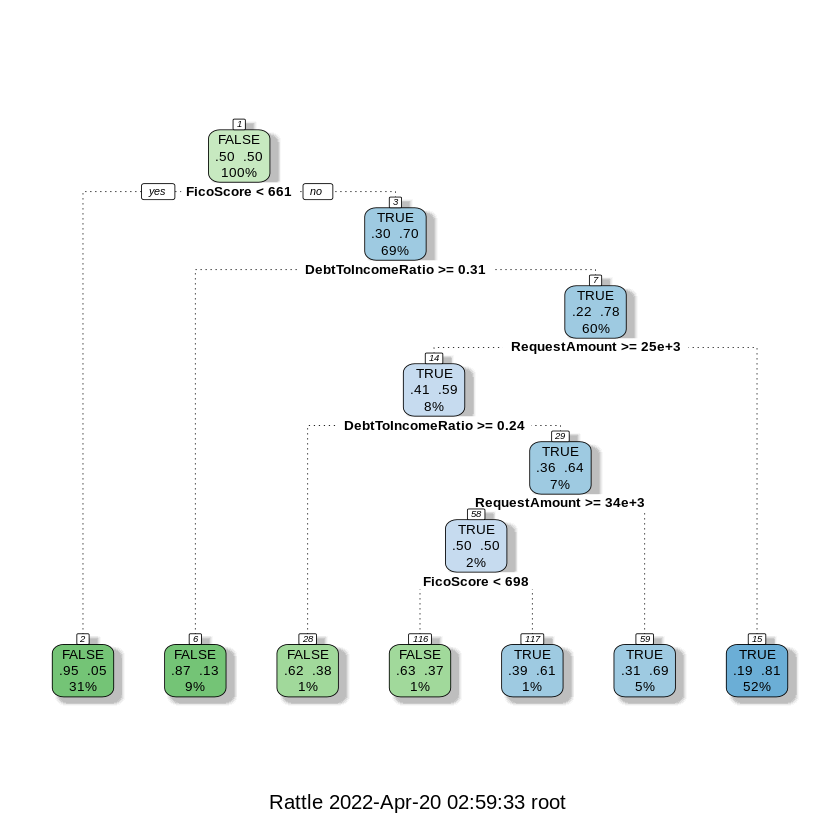

In [74]:
#creating tree of traing data
#cp controles the size of the tree
tree <- rpart(Approval ~ ., data = loans_training, control = rpart.control(cp = 0.001) )

#ploting tree
fancyRpartPlot(tree)

       pred_g
        FALSE  TRUE
  FALSE 55724 19342
  TRUE   3794 71442

[1] 0.8460699

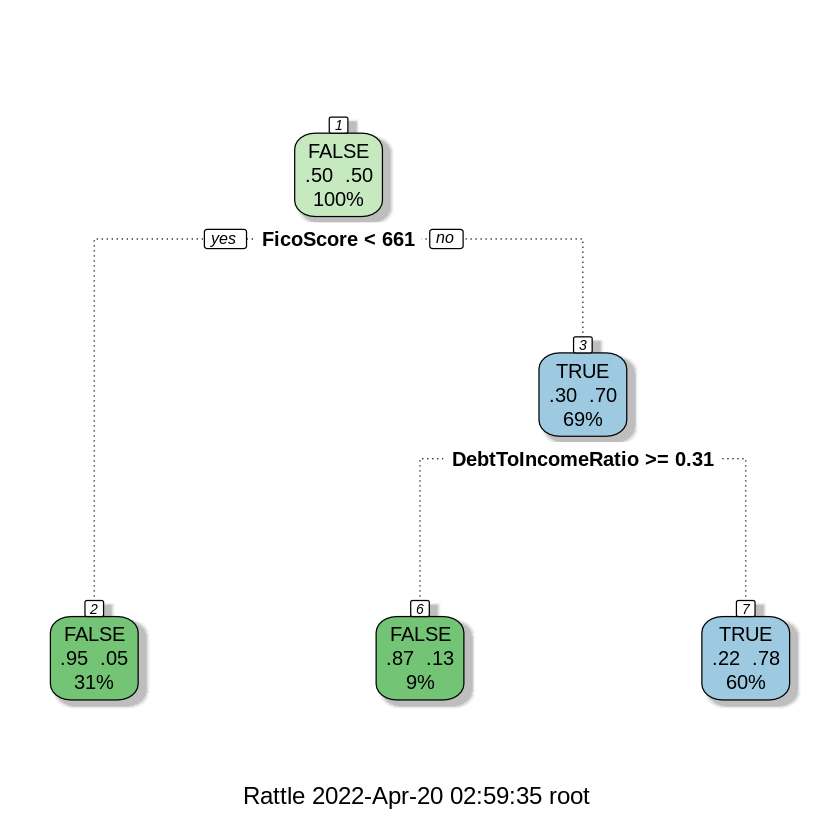

In [75]:
set.seed(1)

# Train and test tree with gini criterion
tree_g <- rpart(Approval ~ ., loans_training, method = "class") #test tree
pred_g <- predict(tree_g, loans_test, type = "class") #prediction 
conf_g <- table(loans_test$Approval, pred_g) #Confusion Matrix
acc_g <- sum(diag(conf_g)) / sum(conf_g) #Accuracy

fancyRpartPlot(tree_g)
conf_g
acc_g

#***Part 2***


In [76]:
#input data
input <- loans_training[,2:5]

In [92]:
#rules of the tree 
rules_model <- C5.0(input, loans_training$Approval, rules=TRUE)
summary(rules_model)


Call:
C5.0.default(x = input, y = loans_training$Approval, rules = TRUE)


C5.0 [Release 2.07 GPL Edition]  	Wed Apr 20 03:09:09 2022
-------------------------------

Class specified by attribute `outcome'

Read 49698 cases (5 attributes) from undefined.data

Rules:

Rule 1: (5499/138, lift 1.9)
	DebtToIncomeRatio > 0.33
	->  class FALSE  [0.975]

Rule 2: (4316/122, lift 1.9)
	DebtToIncomeRatio > 0.26
	FicoScore <= 666
	->  class FALSE  [0.972]

Rule 3: (1568/45, lift 1.9)
	DebtToIncomeRatio <= 0.02
	FicoScore <= 666
	->  class FALSE  [0.971]

Rule 4: (14907/517, lift 1.9)
	FicoScore <= 658
	->  class FALSE  [0.965]

Rule 5: (2716/219, lift 1.8)
	FicoScore <= 672
	RequestAmount > 24000
	->  class FALSE  [0.919]

Rule 6: (329/29, lift 1.8)
	DebtToIncomeRatio <= 0.03
	FicoScore <= 707
	RequestAmount > 24000
	->  class FALSE  [0.909]

Rule 7: (2649/248, lift 1.8)
	DebtToIncomeRatio > 0.26
	RequestAmount > 22000
	->  class FALSE  [0.906]

Rule 8: (256/26, lift 1.8)
	DebtToIncomeRatio > 0.

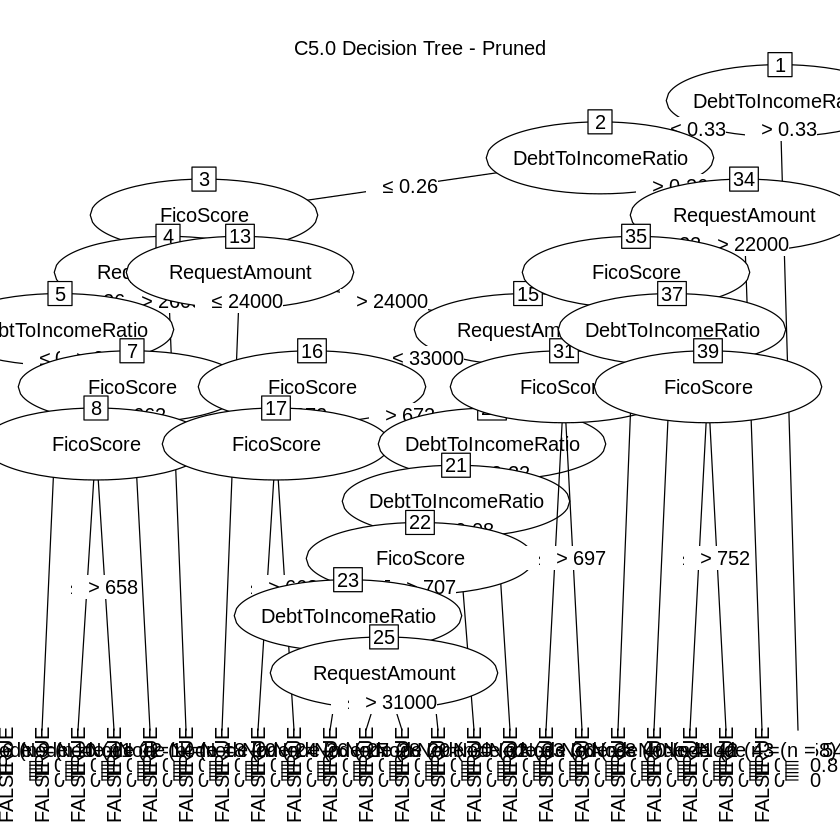

In [87]:
#displays a purned version of the decision tree
treeC50 <- C5.0(loans_training[,2:5], loans_training$Approval, control = C5.0Control(noGlobalPruning = FALSE))
plot(treeC50, main="C5.0 Decision Tree - Pruned")

In [88]:
#summery of tree 
summary(treeC50)


Call:
C5.0.default(x = loans_training[, 2:5], y = loans_training$Approval, control
 = C5.0Control(noGlobalPruning = FALSE))


C5.0 [Release 2.07 GPL Edition]  	Wed Apr 20 03:05:00 2022
-------------------------------

Class specified by attribute `outcome'

Read 49698 cases (5 attributes) from undefined.data

Decision tree:

DebtToIncomeRatio > 0.33: FALSE (5499/138)
DebtToIncomeRatio <= 0.33:
:...DebtToIncomeRatio > 0.26:
    :...RequestAmount > 22000: FALSE (1058/233)
    :   RequestAmount <= 22000:
    :   :...FicoScore <= 666: FALSE (1415/98)
    :       FicoScore > 666:
    :       :...DebtToIncomeRatio <= 0.28: TRUE (823/281)
    :           DebtToIncomeRatio > 0.28:
    :           :...FicoScore <= 752: TRUE (1309/627)
    :               FicoScore > 752: FALSE (67/20)
    DebtToIncomeRatio <= 0.26:
    :...FicoScore <= 666:
        :...RequestAmount > 26000: FALSE (1314/64)
        :   RequestAmount <= 26000:
        :   :...DebtToIncomeRatio <= 0.02: FALSE (1441/44)
        :

In [96]:
#returns prediction on wether Approve is True or False 
predClass <- predict(treeC50, newdata = loans_test, type = "class")

#return the percentage of certenty 
predProb <- predict(treeC50, newdata = loans_test, type = "prob")

conf_gC50 <- table(loans_test$Approval, predClass) #Confusion Matrix
acc_gC50 <- sum(diag(conf_gC50)) / sum(conf_gC50) #Accuracy

conf_gC50
acc_gC50

       predClass
        FALSE  TRUE
  FALSE 56628 18438
  TRUE   4122 71114

[1] 0.8499022

#***Part 3***

In [97]:
#CART method
print("CART")

conf_g #confusion matrix 
acc_g #accuracy 

[1] "CART"


       pred_g
        FALSE  TRUE
  FALSE 55724 19342
  TRUE   3794 71442

[1] 0.8460699

In [98]:
#C 5.0 method  
print("C 5.0")

conf_gC50 #confusion matrix 
acc_gC50 #accuracy 

[1] "C 5.0"


       predClass
        FALSE  TRUE
  FALSE 56628 18438
  TRUE   4122 71114

[1] 0.8499022

#***Conclusion***
After doing some testing, both the Cart an C 5.0, i have determined that the C 5.0 method is better and will produce a more accurate result. 
c 5.0 accuracy = 84.9%
CART accuracy = 84.6%